In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist

import matplotlib.pyplot as plt

In [90]:
# Load in the dataframe
df = pd.read_csv("covid19.csv")

In [91]:
# Looking at first 5 rows of the dataset
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [92]:
df[["abstract"]].head()

,abstract
0,Next-generation sequencing is increasingly bei...
1,An emerging disease is one infectious epidemic...
2,Germline variation at immunoglobulin gene (IG)...
3,Deep sequencing of clinical samples is now an ...
4,Developing methods to reconstruct transmission...


In [7]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

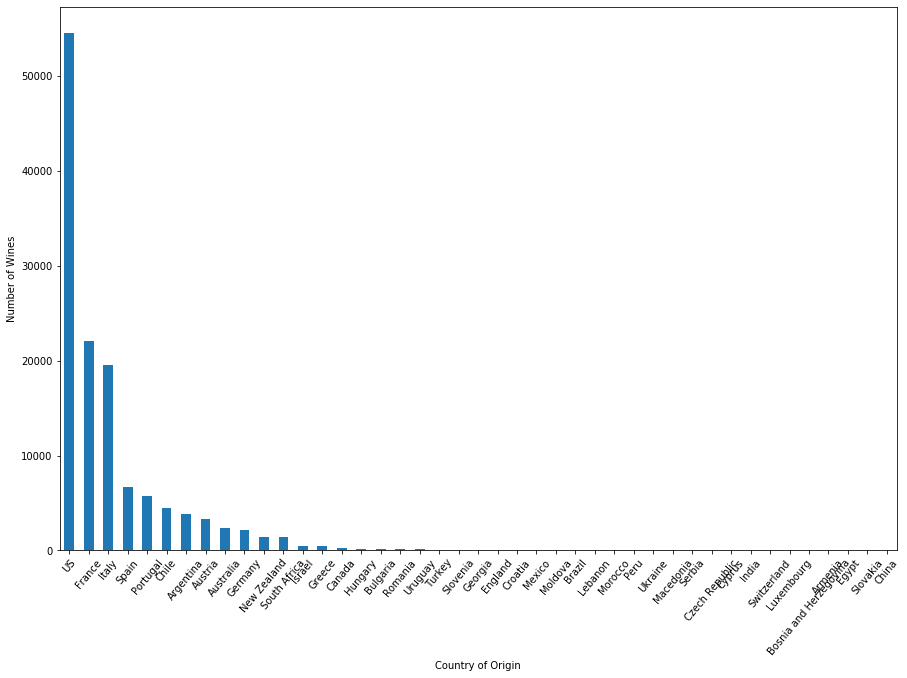

In [8]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

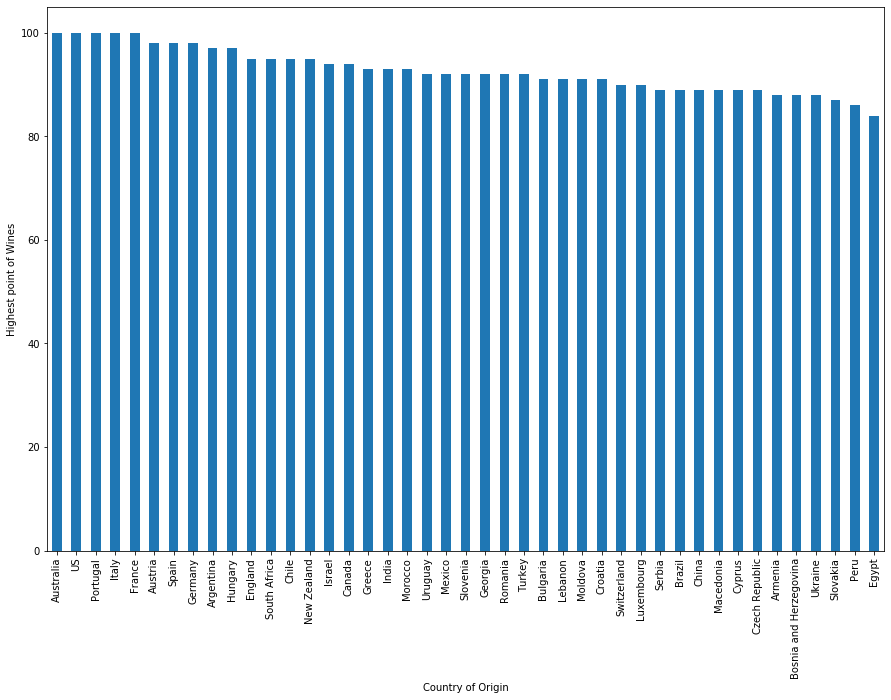

In [9]:
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

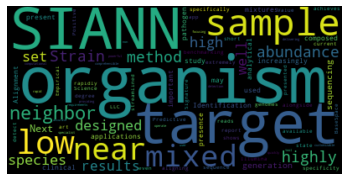

In [93]:
# Start with one review:
text = df.abstract[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
df.abstract

0        Next-generation sequencing is increasingly bei...
1        An emerging disease is one infectious epidemic...
2        Germline variation at immunoglobulin gene (IG)...
3        Deep sequencing of clinical samples is now an ...
4        Developing methods to reconstruct transmission...
                               ...                        
45769    Abstract Purpose The recent Ebola epidemic tha...
45770    Abstract Background Viral respiratory infectio...
45771    There are no criteria for a pandemic, but covi...
45772                                                  NaN
45773    Emerging and re-emerging pathogens represent a...
Name: abstract, Length: 45774, dtype: object

In [95]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [106]:
df.abstract.dropna()

0        Next-generation sequencing is increasingly bei...
1        An emerging disease is one infectious epidemic...
2        Germline variation at immunoglobulin gene (IG)...
3        Deep sequencing of clinical samples is now an ...
4        Developing methods to reconstruct transmission...
                               ...                        
45768    Abstract Background Little is known about the ...
45769    Abstract Purpose The recent Ebola epidemic tha...
45770    Abstract Background Viral respiratory infectio...
45771    There are no criteria for a pandemic, but covi...
45773    Emerging and re-emerging pathogens represent a...
Name: abstract, Length: 37913, dtype: object

In [109]:
text = " ".join(review for review in df.abstract.dropna())
print ("There are {} words in the combination of all review.".format(len(text)))

There are 51803632 words in the combination of all review.


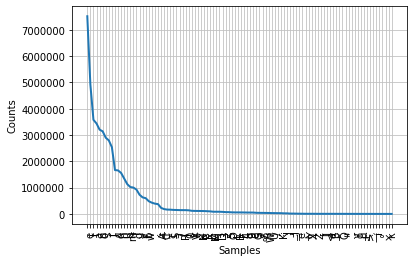

In [110]:
freq = FreqDist(text)
freq.plot(100)

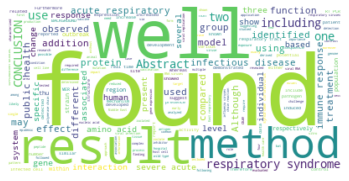

In [113]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["virus", "case", "infection", "cov", "sars"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
wine_mask = np.array(Image.open("winemask.png"))
wine_mask

FileNotFoundError: [Errno 2] No such file or directory: 'winemask.png'

In [17]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [18]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

NameError: name 'wine_mask' is not defined

In [22]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

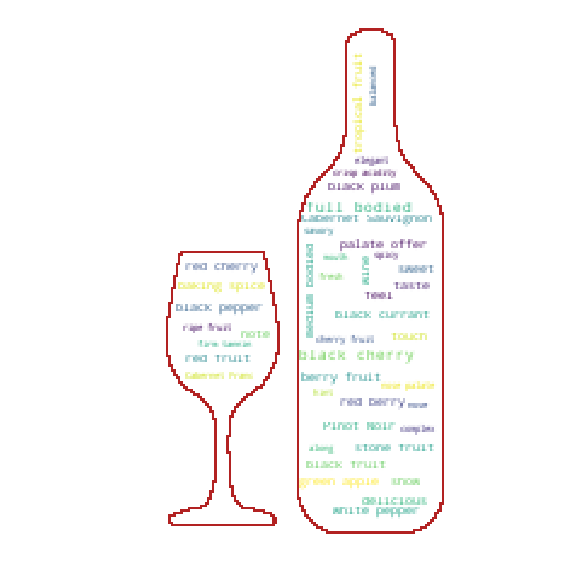

In [26]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()